In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
from tqdm import tqdm
import seaborn as sns
%matplotlib inline
import train_util
import util
%load_ext autoreload
%autoreload 2

from keras.models import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
X, X_feat, Y = train_util.get_data( size=(128, 128, 3))


 96%|█████████▌| 3736/3887 [00:32<00:01, 116.27it/s]


100%|██████████| 3887/3887 [00:33<00:00, 116.27it/s]


In [5]:
depth = pd.read_csv('./data/depths.csv')

In [6]:
X.shape

NameError: name 'X' is not defined

In [72]:
def get_salt_propotion(im_id):
    if im_id in train_util.BAD_MASKS:
        data_type = 'bad_train'
        return pd.Series({'data_type':data_type})
    base_mask_path = './data/masks/'
    mask_path = './data/train/masks/' + im_id + '.png'
    mask = cv2.imread(mask_path)
    if mask is None:
        data_type = 'test'
        return pd.Series({'data_type':data_type})
    else:
        data_type = 'train'
        mask = np.array(mask, dtype='float32')
        mask /= 255
        salt_propotion = mask.mean()
        return pd.Series({'data_type':data_type, 'salt_propotion':salt_propotion})


In [73]:
tqdm.pandas()
salt_prop = depth['id'].progress_apply(get_salt_propotion)


100%|██████████| 22000/22000 [00:07<00:00, 2868.44it/s]


In [74]:
depth_prop = depth.merge(salt_prop, right_index=True, left_index=True)

In [75]:
depth_prop['no_salt'] = depth_prop['salt_propotion'] == 0

In [76]:
depth_prop['no_salt'].value_counts()

False    20438
True      1562
Name: no_salt, dtype: int64

In [77]:
depth_prop['data_type'].value_counts()

test         18000
train         3887
bad_train      113
Name: data_type, dtype: int64

In [78]:
depth_prop.to_csv('./data/depth_prop.csv', index=False)

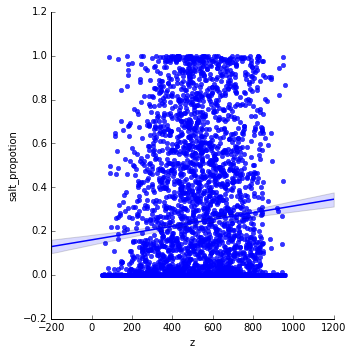

In [79]:
sns.lmplot(data=depth_prop, x='z', y ='salt_propotion')

In [71]:
depth_prop[depth_prop['sult_propotion']  > 0.9]

,id,z,data_type,sult_propotion,no_sult
8,cffbfab33b,755,train,0.989315,False
16,b12a5a2b61,475,train,0.988433,False
49,eabe9337a9,540,train,0.946084,False
67,3c2f5ba174,537,train,0.979708,False
68,9fff0319cd,490,train,0.993236,False
81,5edca1bb89,368,train,0.999510,False
86,05be526826,308,train,0.950495,False
109,bb6683a533,626,train,0.956279,False
144,d768234bb5,489,train,0.924517,False
145,c353af5098,757,train,0.995000,False


In [59]:
mask /= 255.

TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'B') according to the casting rule ''same_kind''

In [18]:
mask = cv2.imread('./data/masks/9090f8f97b.png')

In [19]:
'./data/'

In [17]:
depth

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783
5,2ffea0c397,429
6,6cf284fb9e,600
7,d0244d6c38,51
8,cffbfab33b,755
9,e82421363e,68


In [107]:
mask = cv2.imread('./data/masks/test.png')

In [109]:
mask is None

True

In [69]:
low_depth = depth[(depth['z'] > 100) & (depth['z'] < 200)]

/root/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


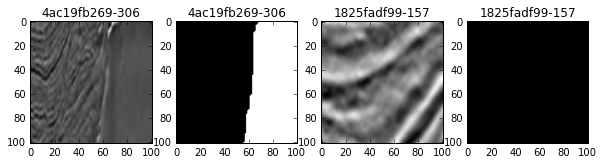

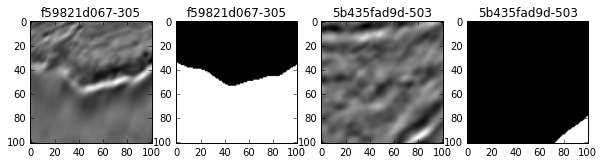

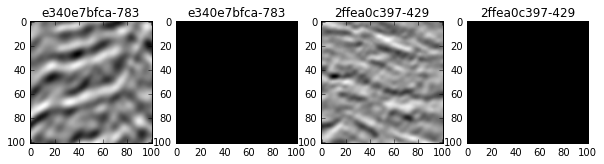

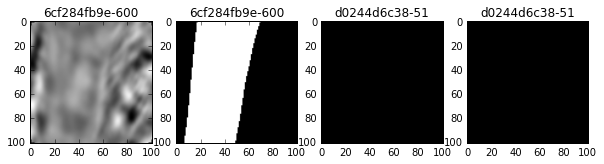

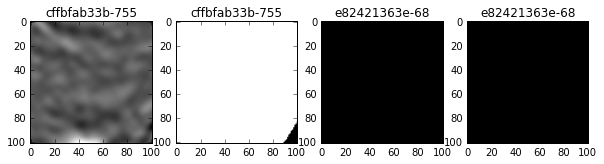

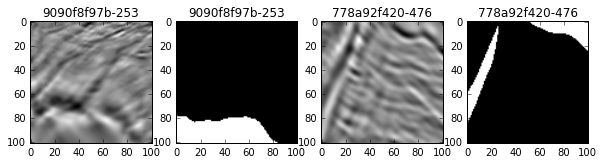

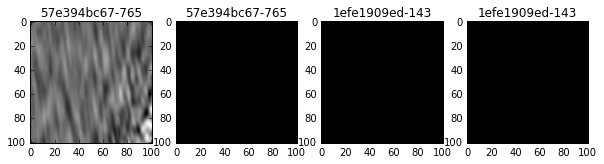

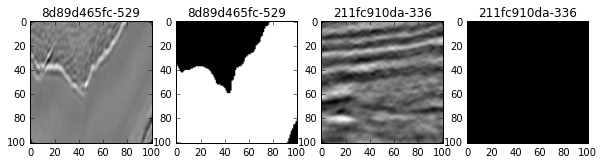

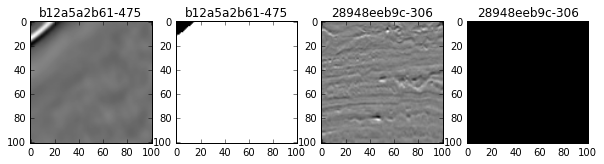

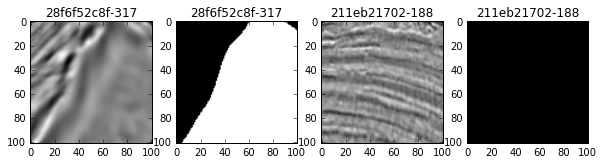

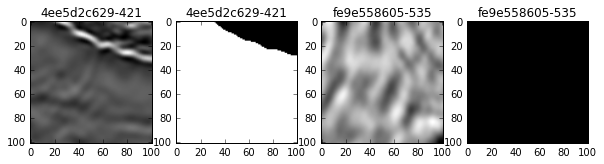

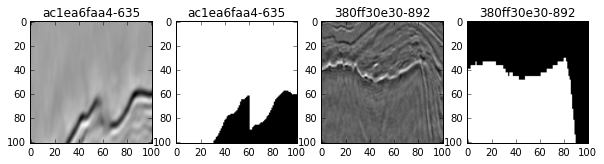

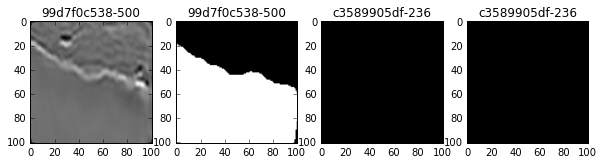

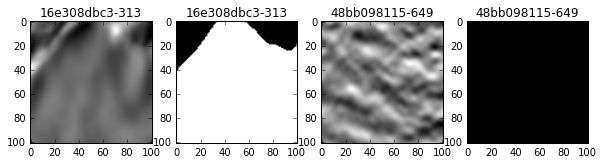

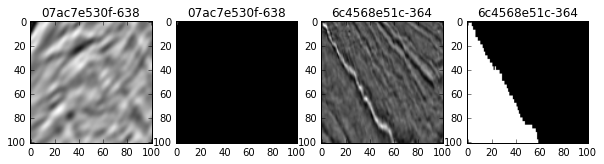

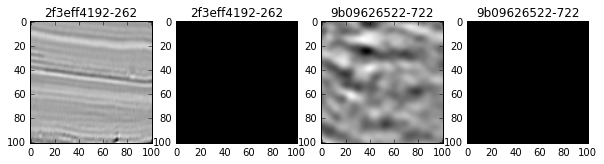

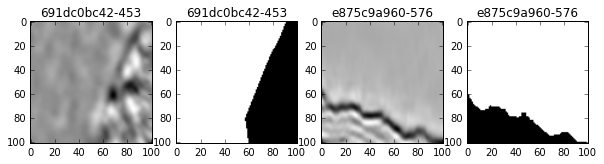

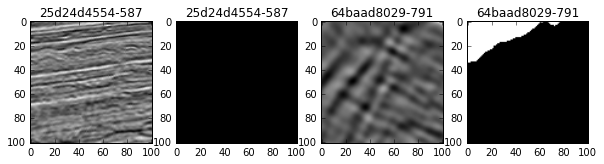

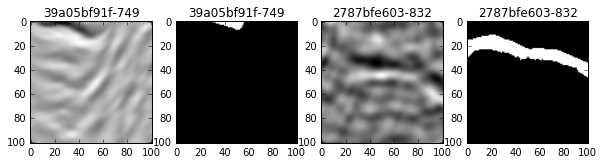

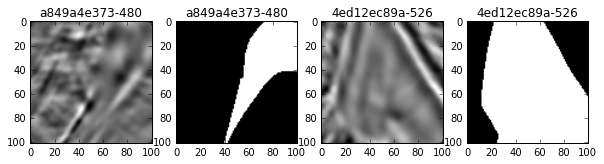

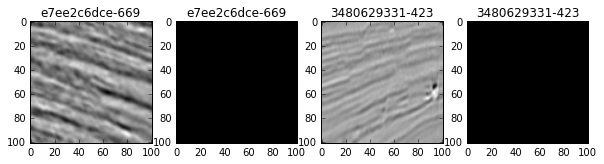

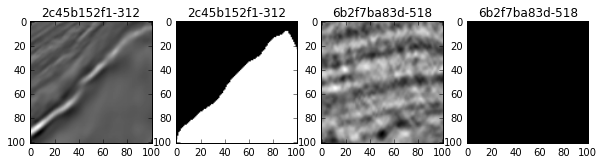

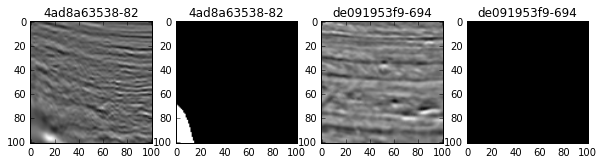

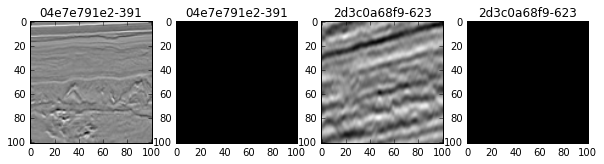

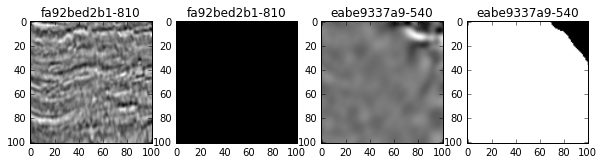

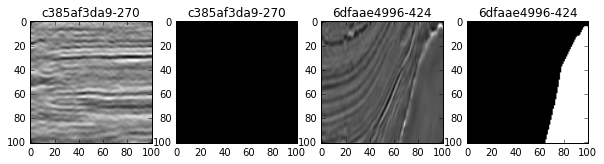

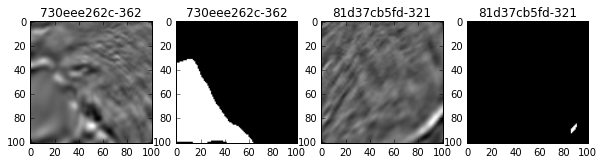

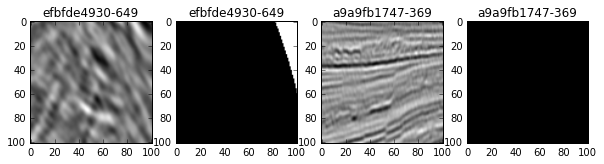

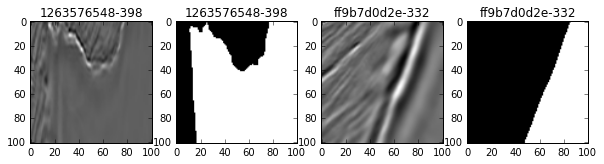

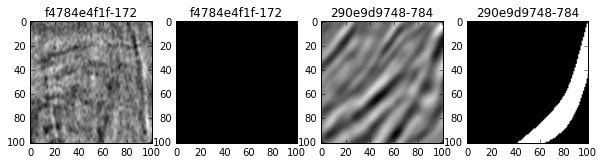

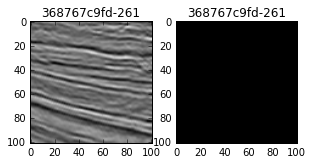

In [85]:
util.show_image_mask(depth)

In [20]:
train = pd.read_csv('./data/train.csv')

In [32]:
bad_masks =[
'1eaf42beee'
,'33887a0ae7'
,'33dfce3a76'
,'3975043a11'
,'39cd06da7d'
,'483b35d589'
,'49336bb17b'
,'4ef0559016'
,'4fbda008c7'
,'4fdc882e4b'
,'50d3073821'
,'53e17edd83'
,'5b217529e7'
,'5f98029612'
,'608567ed23'
,'62aad7556c'
,'62d30854d7'
,'6460ce2df7'
,'6bc4c91c27'
,'7845115d01'
,'7deaf30c4a'
,'80a458a2b6'
,'81fa3d59b8'
,'8367b54eac'
,'849881c690'
,'876e6423e6'
,'90720e8172'
,'916aff36ae'
,'919bc0e2ba'
,'a266a2a9df'
,'a6625b8937'
,'a9ee40cf0d'
,'aeba5383e4'
,'b63b23fdc9'
,'baac3469ae'
,'be7014887d'
,'be90ab3e56'
,'bfa7ee102e'
,'bfbb9b9149'
,'c387a012fc'
,'c98dfd50ba'
,'caccd6708f'
,'cb4f7abe67'
,'d0bbe4fd97'
,'d4d2ed6bd2'
,'de7202d286'
,'f0c401b64b'
,'f19b7d20bb'
,'f641699848'
,'f75842e215'
,'00950d1627'
,'0280deb8ae'
,'06d21d76c4'
,'09152018c4'
,'09b9330300'
,'0b45bde756'
,'130229ec15'
,'15d76f1672'
,'182bfc6862'
,'23afbccfb5'
,'24522ec665'
,'285f4b2e82'
,'2bc179b78c'
,'2f746f8726'
,'3cb59a4fdc'
,'403cb8f4b3'
,'4f5df40ab2'
,'50b3aef4c4'
,'52667992f8'
,'52ac7bb4c1'
,'56f4bcc716'
,'58de316918'
,'640ceb328a'
,'71f7425387'
,'7c0b76979f'
,'7f0825a2f0'
,'834861f1b6'
,'87afd4b1ca'
,'88a5c49514'
,'9067effd34'
,'93a1541218'
,'95f6e2b2d1'
,'96216dae3b'
,'96523f824a'
,'99ee31b5bc'
,'9a4b15919d'
,'9b29ca561d'
,'9eb4a10b98'
,'ad2fa649f7'
,'b1be1fa682'
,'b24d3673e1'
,'b35b1b412b'
,'b525824dfc'
,'b7b83447c4'
,'b8a9602e21'
,'ba1287cb48'
,'be18a24c49'
,'c27409a765'
,'c2973c16f1'
,'c83d9529bd'
,'cef03959d8'
,'d4d34af4f7'
,'d9a52dc263'
,'dd6a04d456'
,'ddcb457a07'
,'e12cd094a6'
,'e6e3e58c43'
,'e73ed6e7f2'
,'f6e87c1458'
,'f7380099f6'
,'fb3392fee0'
,'fb47e8e74e'
,'febd1d2a67']

In [35]:
bad_depth = depth[depth['id'].isin(bad_masks)]

In [43]:
depth

[autoreload of train_util failed: Traceback (most recent call last):
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/home/yusuke/tgs-salt-identification/train_util.py", line 43
    depth_csv = depth_csv[!depth_csv['id'].isin(BAD_MASKS)]
                          ^
SyntaxError: invalid syntax
]


,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783
5,2ffea0c397,429
6,6cf284fb9e,600
7,d0244d6c38,51
8,cffbfab33b,755
9,e82421363e,68


In [41]:
train[train['id'].isin(bad_masks)].iloc[0]

id          a266a2a9df
rle_mask     5051 5151
Name: 1, dtype: object

In [45]:
base_image_path = './data/{}/images/*.png'.format('train')
paths = glob(base_image_path)

In [54]:
for p in paths:
    if p.split('/')[-1].split('.')[0] not in bad_masks:
        print(p)

./data/train/images/abb1521de8.png
./data/train/images/33dfe8b243.png
./data/train/images/0cc1d0e4c4.png
./data/train/images/f4784e4f1f.png
./data/train/images/20a0f53112.png
./data/train/images/94c8aad517.png
./data/train/images/bd51537256.png
./data/train/images/53de66df2a.png
./data/train/images/211eb21702.png
./data/train/images/fbc9a1149e.png
./data/train/images/18b26e968c.png
./data/train/images/1a37af90c1.png
./data/train/images/12bf4f2d3b.png
./data/train/images/a56ff4758a.png
./data/train/images/e1bd09e50b.png
./data/train/images/8c99d8c85f.png
./data/train/images/7277ef5fef.png
./data/train/images/f2c869e655.png
./data/train/images/d800abe6a4.png
./data/train/images/04182ced8e.png
./data/train/images/6ac91c75fc.png
./data/train/images/adf2a57778.png
./data/train/images/35499d9dd6.png
./data/train/images/a89fc2586a.png
./data/train/images/83bb4578eb.png
./data/train/images/9f54d7807c.png
./data/train/images/fa01eb7fdf.png
./data/train/images/cb6c6c15ce.png
./data/train/images/